# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [470]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.jpg')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

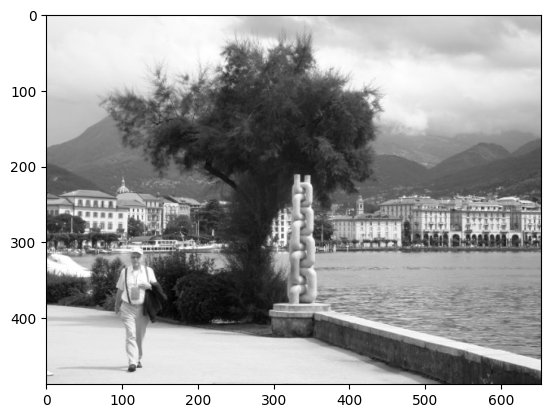

In [471]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [472]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

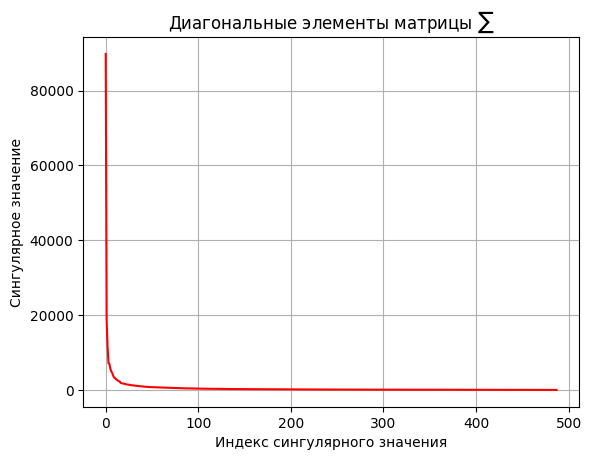

<Figure size 1000x1000 with 0 Axes>

In [473]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.plot(S, color='red')
plt.title('Диагональные элементы матрицы $\sum$')
plt.ylabel('Сингулярное значение')
plt.xlabel('Индекс сингулярного значения')
plt.grid(True)

plt.figure(figsize=(10, 10))

plt.show()
plt.close()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

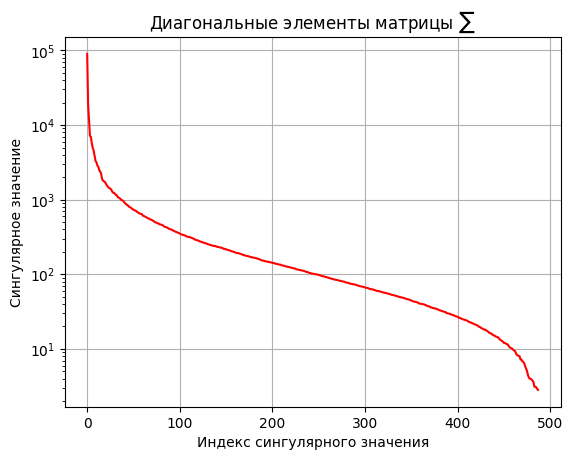

<Figure size 1000x1000 with 0 Axes>

In [474]:
plt.plot(S, color='red')
plt.title('Диагональные элементы матрицы $\sum$')
plt.ylabel('Сингулярное значение')
plt.xlabel('Индекс сингулярного значения')
plt.yscale('log')
plt.grid(True)

plt.figure(figsize=(10, 10))

plt.show()
plt.close()

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

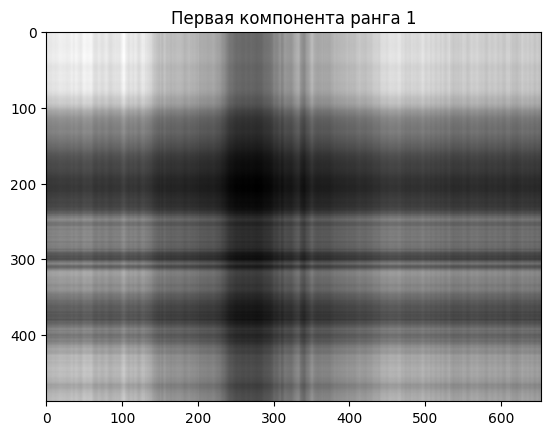

In [475]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
A = U[:, :1] @ np.diag(S[0:1]) @ VT[:1, :]

plt.title('Первая компонента ранга 1')

plt.imshow(A, cmap='gray')

Результат довольно необычный, но его можно объяснить тем, что мы взяли мало значений, поэтому качество картинки настолько низкое

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

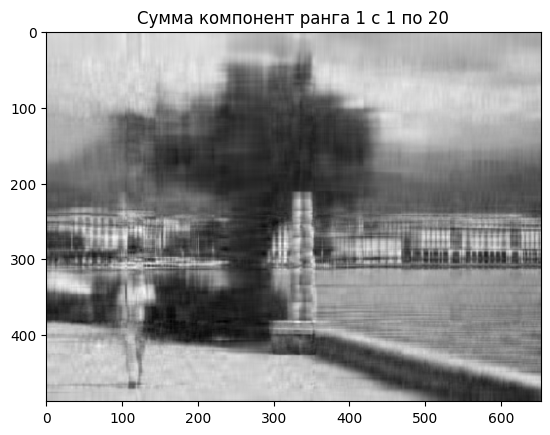

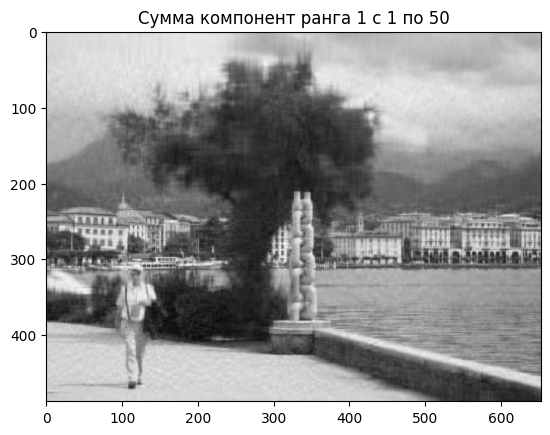

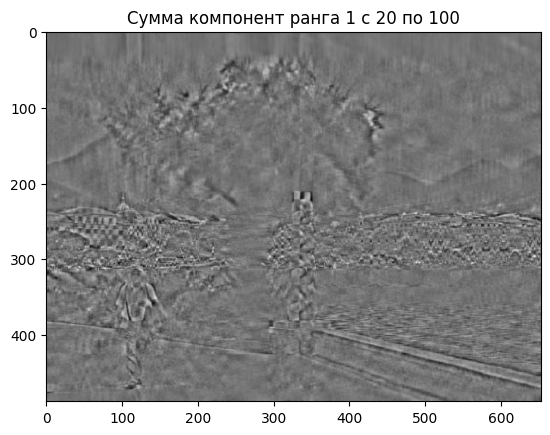

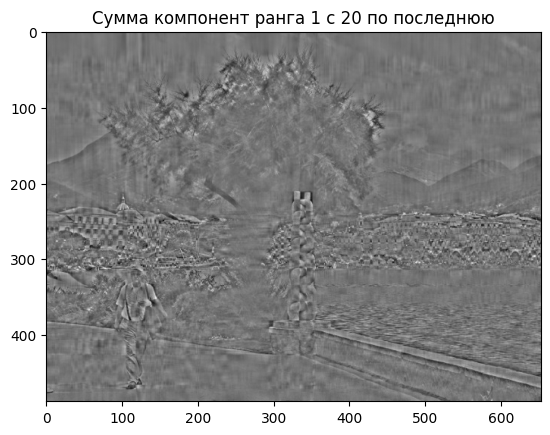

In [476]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
A_20 = U[:, :20] @ np.diag(S[0:20]) @ VT[:20, :]
plt.title('Сумма компонент ранга 1 с 1 по 20')
plt.imshow(A_20, cmap='gray')
plt.show()

A_50 = U[:, :50] @ np.diag(S[0:50]) @ VT[:50, :]
plt.title('Сумма компонент ранга 1 с 1 по 50')
plt.imshow(A_50, cmap='gray')
plt.show()

A_20_100 = U[:, 20:100] @ np.diag(S[20:100]) @ VT[20:100, :]
plt.title('Сумма компонент ранга 1 с 20 по 100')
plt.imshow(A_20_100, cmap='gray')
plt.show()

A_20_end = U[:, 20:] @ np.diag(S[20:]) @ VT[20:, :]
plt.title('Сумма компонент ранга 1 с 20 по последнюю')
plt.imshow(A_20_end, cmap='gray')
plt.show()

Сначала заметим, что при взятии компонент с 1 по 20, картинка получилась значительно лучше, чем при взятии только первой компоненты.

Сделаем вывод, что при увеличении количества компонент, качество картинки растет. Этот вывод подтверждается следующим изображением, где мы взяли с 1 по 50 компоненты.

Заметим, что картинки с пропуском первых компонент получились довольно странными, но на них все еще виднеется наше изображение, это можно обяснить тем, что начальные компоненты позволяют задать общую картинку, а последующие уже задают ее детализированность.

Если мы пропустим начальные компоненты, то получится неразборчивая картинка, но если мы возьмем мало компонент, то качество картинки будет очень плохим

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

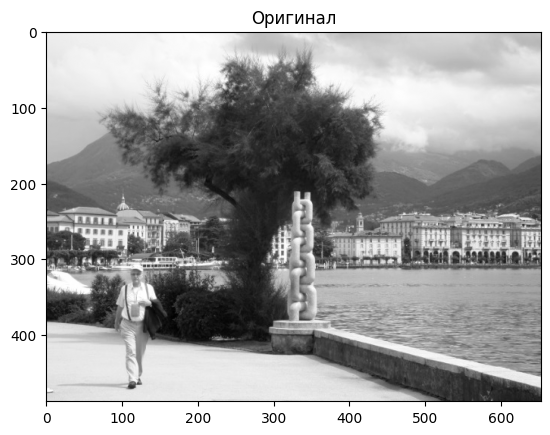

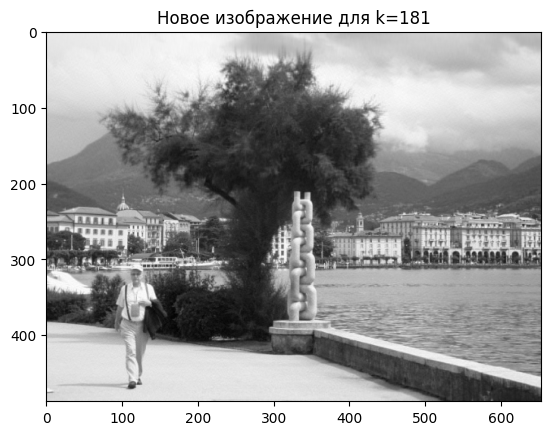

488
181


In [477]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
norm = np.linalg.norm(S)
for i in range(1, len(S)):
    S_new = S[:i]
    new_norm = np.linalg.norm(S_new)
    if new_norm / norm > 0.9999:
        k = i
        break;

new_img = U[:, :k] @ np.diag(S_new) @ VT[:k, :]

plt.title("Оригинал")
plt.imshow(img, cmap='gray')
plt.show()

plt.title(f"Новое изображение для k={k}")
plt.imshow(new_img, cmap='gray')
plt.show()
print(len(S))
print(k)

Я использовал норму Фробениуса для большего сжатия картинки. Это позволяет использовать ещё меньше памяти для хранения той же картинки с незначительными жертвами в виде качества изображения.

Чтобы как можно меньше потерять в детализации, я взял такие первые сингулярные значения, что их норма Фробениуса будет составлять не менее, чем 0.9999 от начальной нормы (new_norm / norm > 0.9999).

 Благодаря такому условию мы можем сохранять не все сингулярные значения, а первые 181 (получилось убрать 307 значений). Это значительно сэкономит память, поскольку теперь мы вместо того, чтобы хранить матрицы $U$, $\sum$, $V^T$ полностью, можем хранить первые 181 столбцов.

 Также важно брать компоненты, начиная с первого, поскольку в начальных компонентах содержится наибольшее количество информации, а в тех, что идут дальше, уже сильно меньше

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

In [478]:
print(U.shape)
print(VT.shape)
print(S.shape)

(488, 488)
(488, 653)
(488,)


╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Память для начального представления: n * m

Память для начального представления с помощью СВД: m * m + max(n, m) + n * n

Если брать усеченное разложение, то получится: m * min(n, m) + min(n, m) + n * min(n, m), где min(n, m) = 488 для этого изображения

Память для начального представление с уменьшением количества столбцов: m * 181 + 181 + n * 181, где 181 < min(n, m)

Для нашего примера: m = 488, n = 653

Если высчитывать численно, то ответ получается: (488 * 653) / (488 * 181 + 181 + 653 * 181) ≈ 1.54


**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [479]:
U_k = U[:, :k].copy()  # m * k
S_k = S[:k].copy()  # k
VT_k = VT[:k, :].copy()  # n * k

new_size = U_k.nbytes + S_k.nbytes + VT_k.nbytes
print(new_size, 'новая память')
original_size = img.nbytes
print(original_size, 'старая память')
result = original_size / new_size
print(result, 'отношение')

1653616 новая память
2549312 старая память
1.5416590066859537 отношение


╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Как мы видим, торетический результат и практический совпали. Стоит учитывать, что матрицы в numpy тоже занимают место поэтому если учитывать и их размер, то результат должен слегка ухудшиться, поскольку три матрицы хранить дороже, чем одну, но ухудшение будет незначительным. Можно ещё больше памяти сэкономить, но тогда потеряем в качестве. Ещё можно снизить критерий отбора, тогда тоже уменьшим потребление памяти

In [480]:
from sys import getsizeof
print(getsizeof(img))
print(getsizeof(U_k) + getsizeof(S_k) + getsizeof(VT_k))
print(getsizeof(img) / (getsizeof(U_k) + getsizeof(S_k) + getsizeof(VT_k)))

2549440
1653984
1.5413933871186178


### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


1) $\sigma_1 = \max_w \frac{|X_w|}{|w|} $

Пусть w = av, |v| = 1

$\frac{|Xw|}{|w|} = \frac{|aXv|}{|a|} = |Xv|$

$Xv = U \Sigma V^Tv$. Т.к. $V$ ортогональна $\Rightarrow |V^Tv| = |v| = 1$

Т.к. $U$ ортогональна $\Rightarrow |Xv| = |U \Sigma V^Tv| = |\Sigma V^Tv|$

Пусть $y = V^Tv$, тогда:  $|\Sigma V^Tv|^2 = |\Sigma y|^2 = \sum_{i=1}^n(\sigma_i y_i)^2 \leq \sigma_1^2\sum_{i=1}^n y_i^2 = \sigma_1^2 |y| = \sigma_1^2$

Теперь давайте докажем достижимость:

Пусть $v = v_1$ - первый столбец $V$

$V^Tv_1=y = (1,0,...,0)^T$

$\Sigma y = (\sigma_1 , 0,...,0)^T$

$|Xv_1| = |\Sigma y| = \sigma_1$

2) $\sigma  = \max_{|w| = 1}|Xw|:$

$Xw = X\left( |w| \frac{w}{|w|} \right) = |w| X\left(\frac{w}{|w|} \right) \Rightarrow \frac{Xw}{|w|} = X\left(\frac{w}{|w|} \right) \Rightarrow \frac{|Xw|}{|w|} = \left|X\left(\frac{w}{|w|} \right)\right| \Rightarrow \max_w\frac{|Xw|}{|w|} = \max_w\left|X\left(\frac{w}{|w|} \right)\right|$

При $w \neq 0: \frac{w}{|w|}$ - вектор с нормой 1

Пусть $w' := \frac{w}{|w|} \Rightarrow \max_w\frac{|Xw|}{|w|} = \max_{w'}\left|Xw' \right| \iff \max_w\frac{|Xw|}{|w|} = \max_{|w| = 1}\left|Xw \right| \Rightarrow \sigma_1 = \max_w\frac{|Xw|}{|w|} = \max_{|w| = 1}\left|Xw \right|$

3) $\sigma_1 = \max_{|u| = |v| = 1}|u^TXv|:$

$u^TXv = u^T(U\Sigma V^T)v = (U^Tu)^T\Sigma (V^Tv)$

Пусть $u' = U^Tu; v' = V^Tv$

$|u^TXv| = |\sum_{i=1}^n\sigma_i u'_iv'_i| \leq \sigma_1 \sum_{i=1}^n |u'_iv'_i| \leq \sigma_1 |u'||v'| = \sigma_1$

Максимум достигается при $u = u_1; v = v_1: |u_1^TXv_1| = |\sigma_1(u_1^Tu_1)(v_1^Tv_1)| = |\sigma_1| = \sigma_1$

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
надо

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


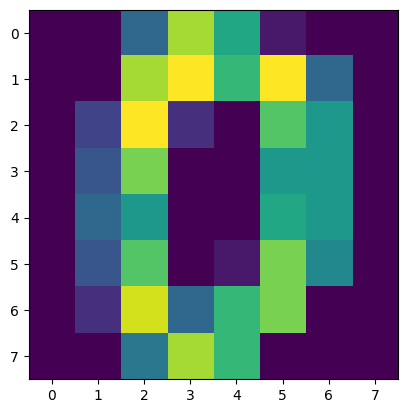

In [481]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [482]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x = digits.data
y = digits.target
U, S, VT = np.linalg.svd(x, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

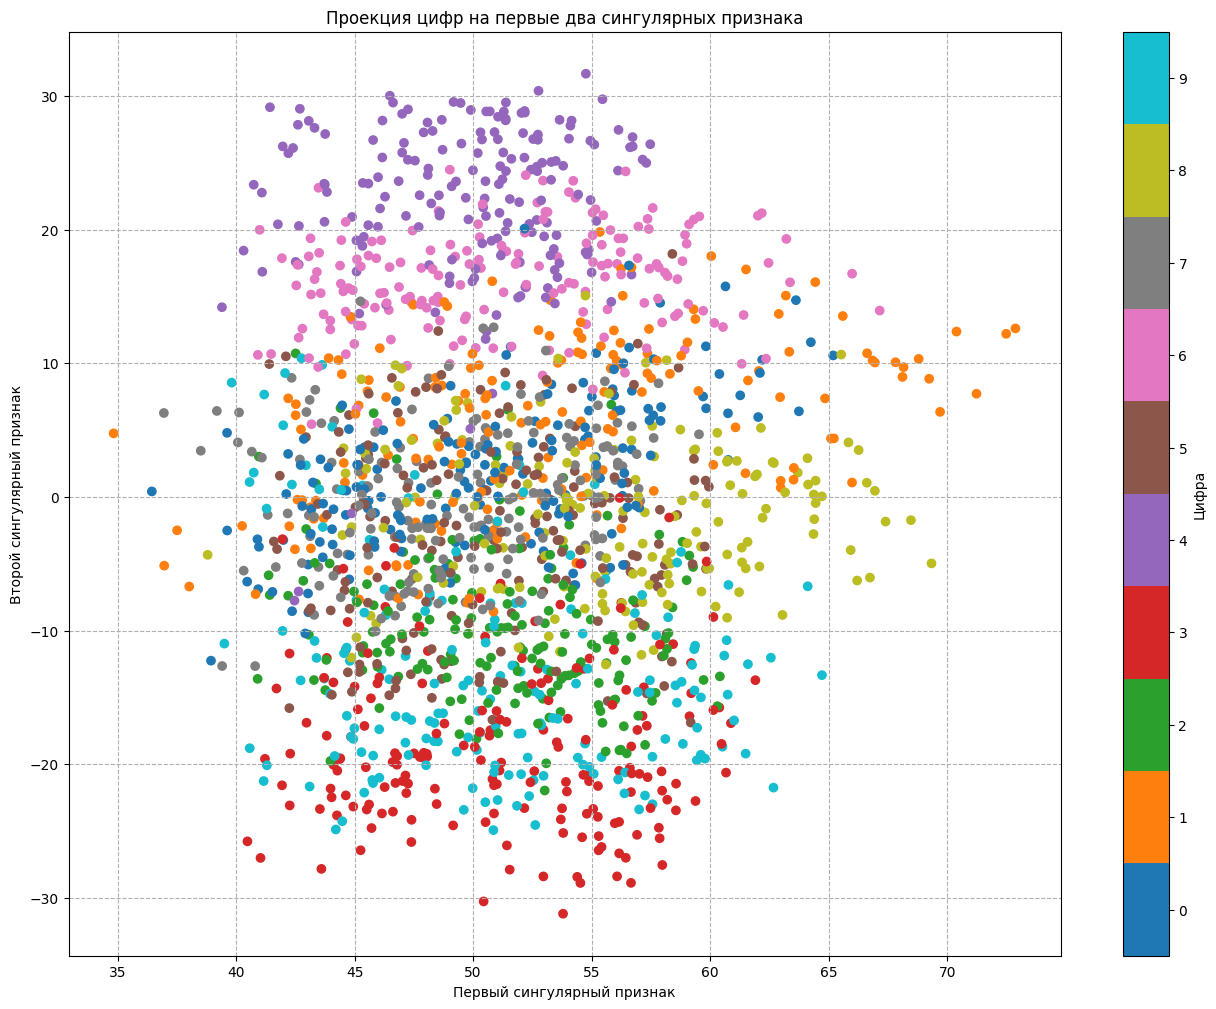

In [483]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
A = U[:, :2] * S[:2]
plt.figure(figsize=(16, 12))

plt.scatter(A[:, 0], A[:, 1], c=y, cmap='tab10')
plt.colorbar(label='Цифра', ticks=range(10))
plt.clim(-0.5, 9.5)

plt.title('Проекция цифр на первые два сингулярных признака')
plt.xlabel('Первый сингулярный признак')
plt.ylabel('Второй сингулярный признак')
plt.grid(True, linestyle='--')

plt.show()
plt.close()

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

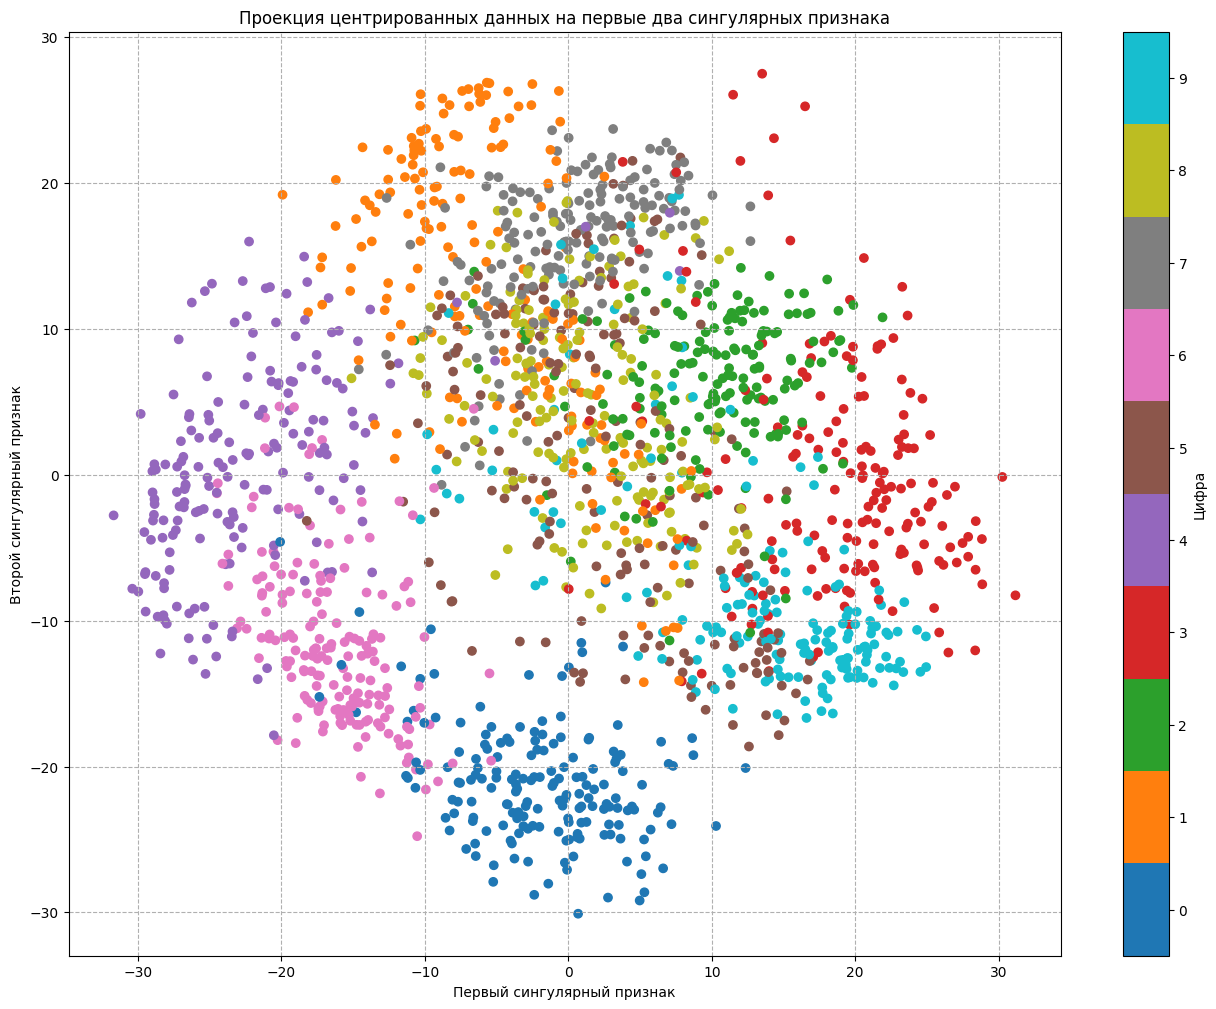

In [484]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x = digits.data
y = digits.target
B = x - np.mean(x, axis=0)
U, S, VT = np.linalg.svd(B, full_matrices=False)

A = U[:, :2] * S[:2]

plt.figure(figsize=(16, 12))

plt.scatter(A[:, 0], A[:, 1], c=y, cmap='tab10')

plt.colorbar(label='Цифра', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title('Проекция центрированных данных на первые два сингулярных признака')
plt.xlabel('Первый сингулярный признак')
plt.ylabel('Второй сингулярный признак')
plt.grid(True, linestyle='--')

plt.show()
plt.close()

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Во второй визуализации цифры гораздо легче разделить на несколько независимых куч, в отличии от первого случая, где все цифры формировали одно огромное скопление точек

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

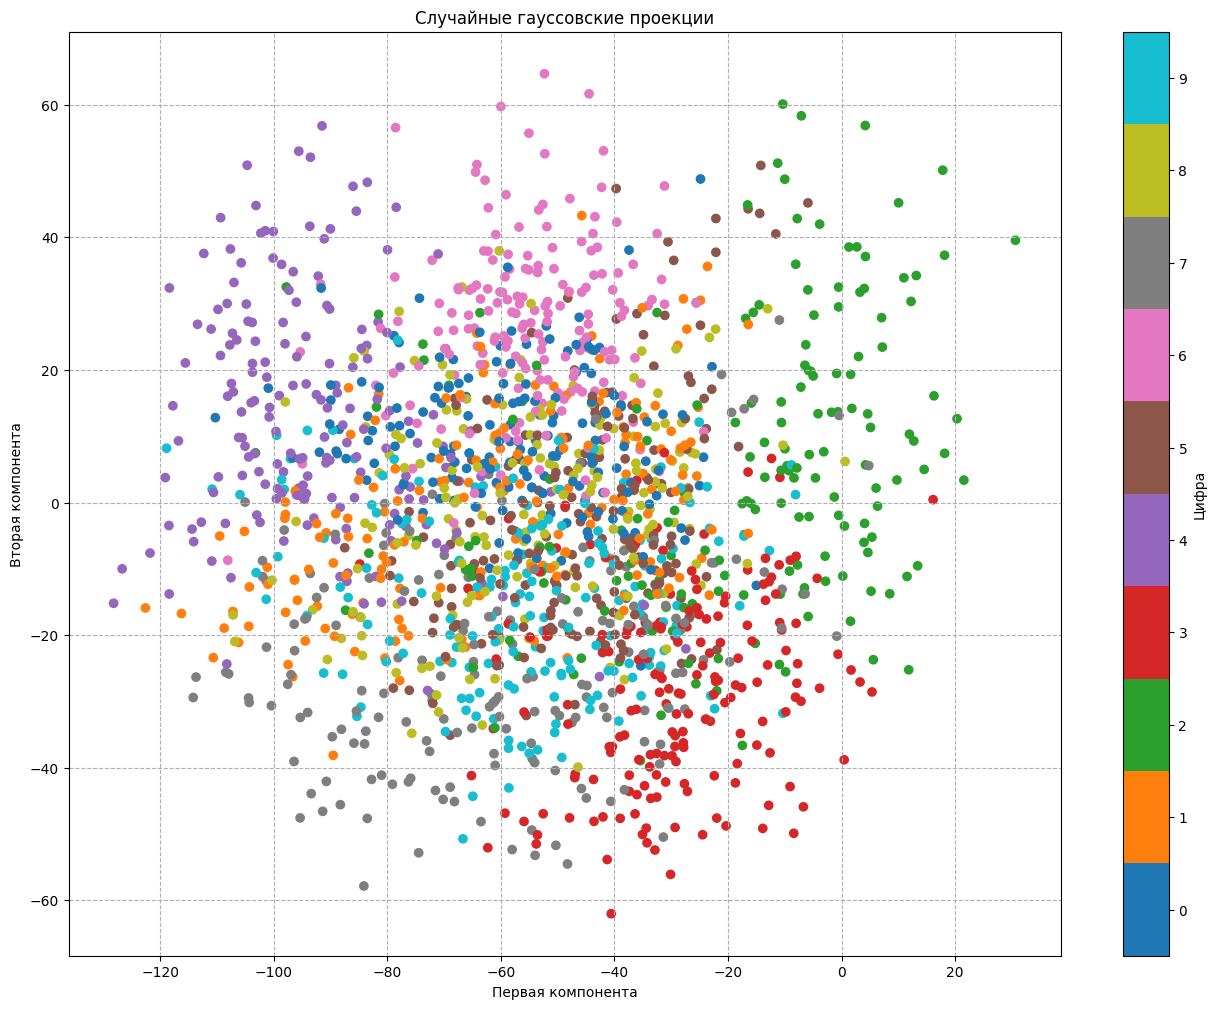

In [485]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.random_projection import GaussianRandomProjection
grp = GaussianRandomProjection(n_components=2, random_state=42)
A_new = grp.fit_transform(x)

plt.figure(figsize=(16, 12))

plt.scatter(A_new[:, 0], A_new[:, 1], c=y, cmap='tab10')

plt.colorbar(label='Цифра', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.title('Случайные гауссовские проекции')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.grid(True, linestyle='--')

plt.show()
plt.close()


SVD отображает данные так, чтобы максимально сохранить расстояния между точками.GRP отображает данные случайно, сохраняя расстояния примерно. Поэтому GRP выдал такую картинку, где все данные собраны в одной большой куче, а у SVD можно четко разделить данные на меньшие кучи

In [486]:
import time

start = time.time()
U, S, VT = np.linalg.svd(B, full_matrices=False)
svd_time = time.time() - start

start = time.time()
grp = GaussianRandomProjection(n_components=2, random_state=42).fit_transform(x)
grp_time = time.time() - start

print("Время выполнения:")
print(f"SVD: {svd_time:.5f} сек")
print(f"GRP: {grp_time:.5f} сек")

Время выполнения:
SVD: 0.01052 сек
GRP: 0.00258 сек


Мы видим, что метод случайных гауссовских проекций работает быстрее, чем СВД. Пусть $=A_{n\times m}$ Поймем, что сложность СВД: $= O(\min(n^2m, nm^2))$. А GRP умножает матрицу $A_{n \times m}$ на случайную матрицу $R_{m \times k}$, тогда сложность GRP $=O(nmk)$. При больших n, m GRP будет значительно быстрее, чем SVD, что и показал нам эксперимент

In [487]:
from sklearn.metrics import silhouette_score

print(f"SVD Silhouette Score: {silhouette_score(A, y):.3f}")
print(f"RP Silhouette Score: {silhouette_score(A_new, y):.3f}")


SVD Silhouette Score: 0.105
RP Silhouette Score: -0.040


SVD сохраняет структуру, точки внутри куч, на которые можно разбить данные, ближе друг к другу, чем к другим кучам. GRP сохраняет расстояния приблизительно и может перемещать данные, если проекция неудачная. Это подтверждает silhouette_score

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$:

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [488]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

<ipython-input-489-5545a14a65cb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
<ipython-input-489-5545a14a65cb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
<ipython-input-489-5545a14a65cb>:14: UserWarning: 

`distplot` i

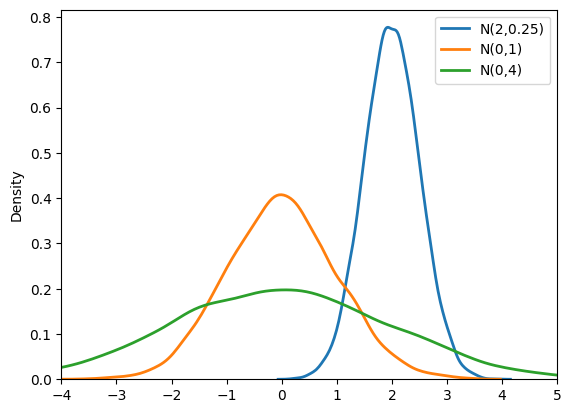

In [489]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат.
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

<Axes: >

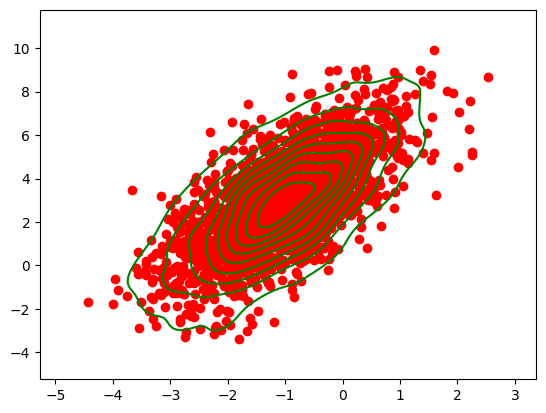

In [490]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(x=s[:, 0], y=s[:, 1], fill=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

<Axes: >

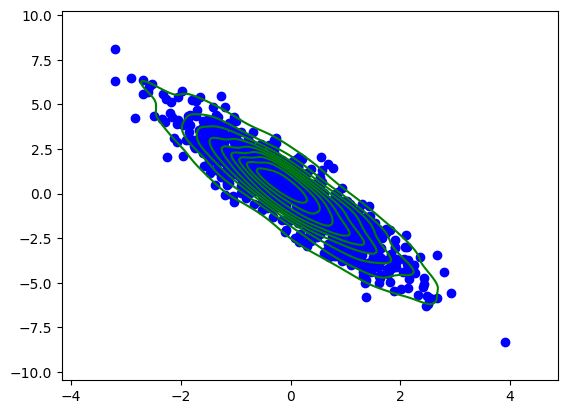

In [492]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
N = 1000
s = np.random.multivariate_normal(mean=np.array([0, 0]), cov=np.array([[1, -2],[-2, 5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='blue')
sns.kdeplot(x=s[:, 0], y=s[:, 1], fill=False, color='green')

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

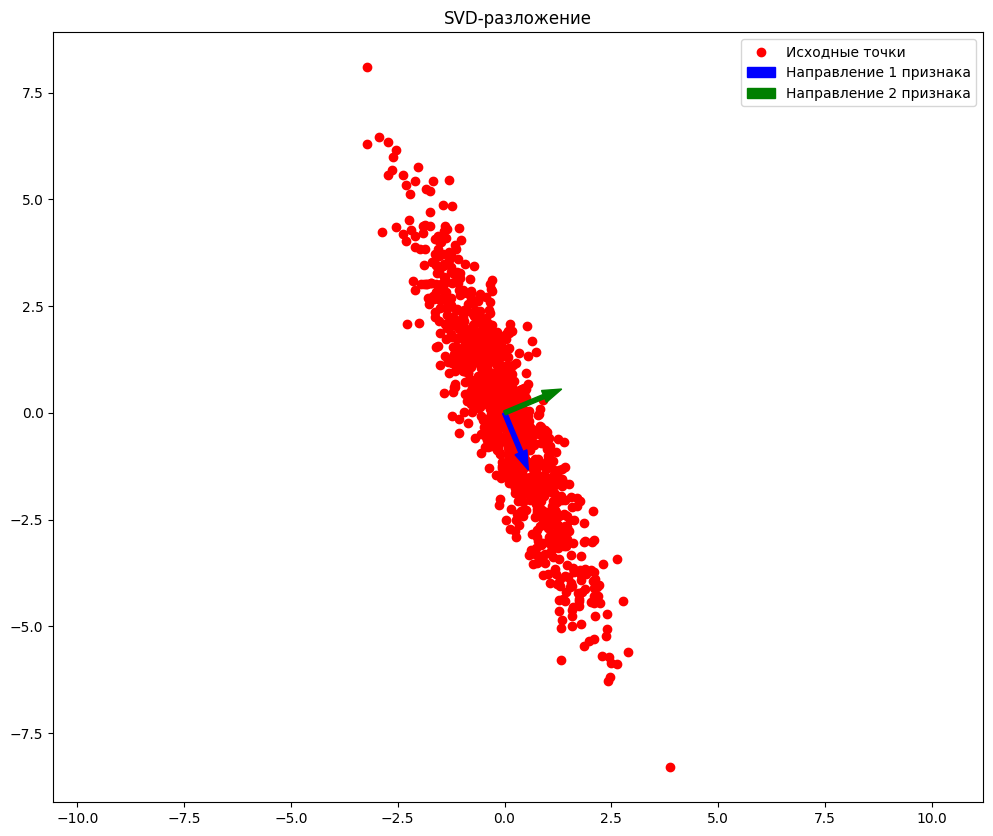

In [493]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x = s - np.mean(s, axis=0)

U, S, VT = np.linalg.svd(x, full_matrices=False)

plt.figure(figsize=(12, 10))

plt.scatter(x[:, 0], x[:, 1], color='red', label='Исходные точки')
plt.arrow(0, 0, VT[0, 0], VT[0, 1], color='blue', width=0.1, label='Направление 1 признака')
plt.arrow(0, 0, VT[1, 0], VT[1, 1], color='green', width=0.1, label='Направление 2 признака')

plt.title('SVD-разложение')
plt.legend()
plt.axis('equal')
plt.show()
plt.close()

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже.

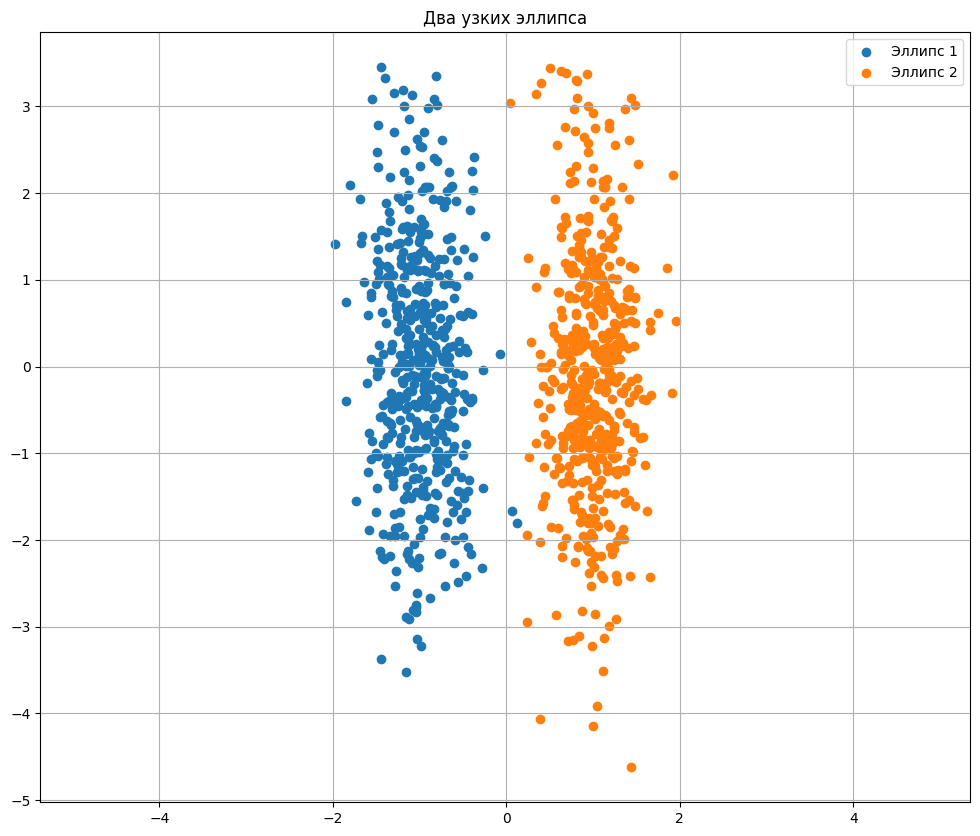

In [494]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

center1, center2 = np.array([-1, 0]), np.array([1, 0])
cov = np.array([[0.1, 0], [0, 2]])

elipse1 = np.random.multivariate_normal(center1, cov, 500)
elipse2 = np.random.multivariate_normal(center2, cov, 500)
x_elipses = np.vstack([elipse1, elipse2])

plt.figure(figsize=(12, 10))

plt.scatter(elipse1[:, 0], elipse1[:, 1], label='Эллипс 1')
plt.scatter(elipse2[:, 0], elipse2[:, 1], label='Эллипс 2')

plt.title('Два узких эллипса')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

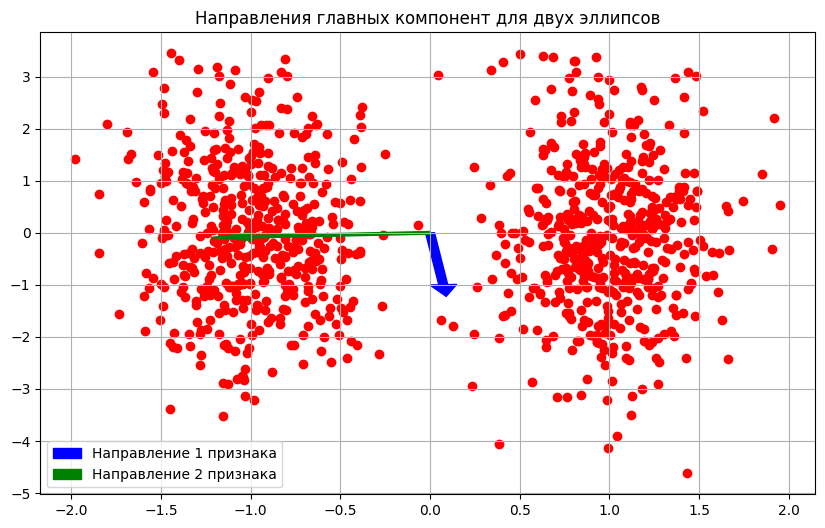

In [495]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_elipses_centered = x_elipses - np.mean(x_elipses, axis=0)

U, S, VT = svd(x_elipses_centered, full_matrices=False)

plt.figure(figsize=(10, 6))
plt.scatter(x_elipses[:, 0], x_elipses[:, 1], color='red')

plt.arrow(0, 0, VT[0, 0], VT[0, 1], color='blue', width=0.05, label='Направление 1 признака')
plt.arrow(0, 0, VT[1, 0], VT[1, 1], color='green', width=0.05, label='Направление 2 признака')

plt.title('Направления главных компонент для двух эллипсов')
plt.legend()
plt.grid(True)
plt.show()

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
1. Направление 1 признака не разделяет на типы элипсов, проекции полностью перекрываюся
2. Направление 2 признака разделило элипсы на типы, ничего не перекрыто

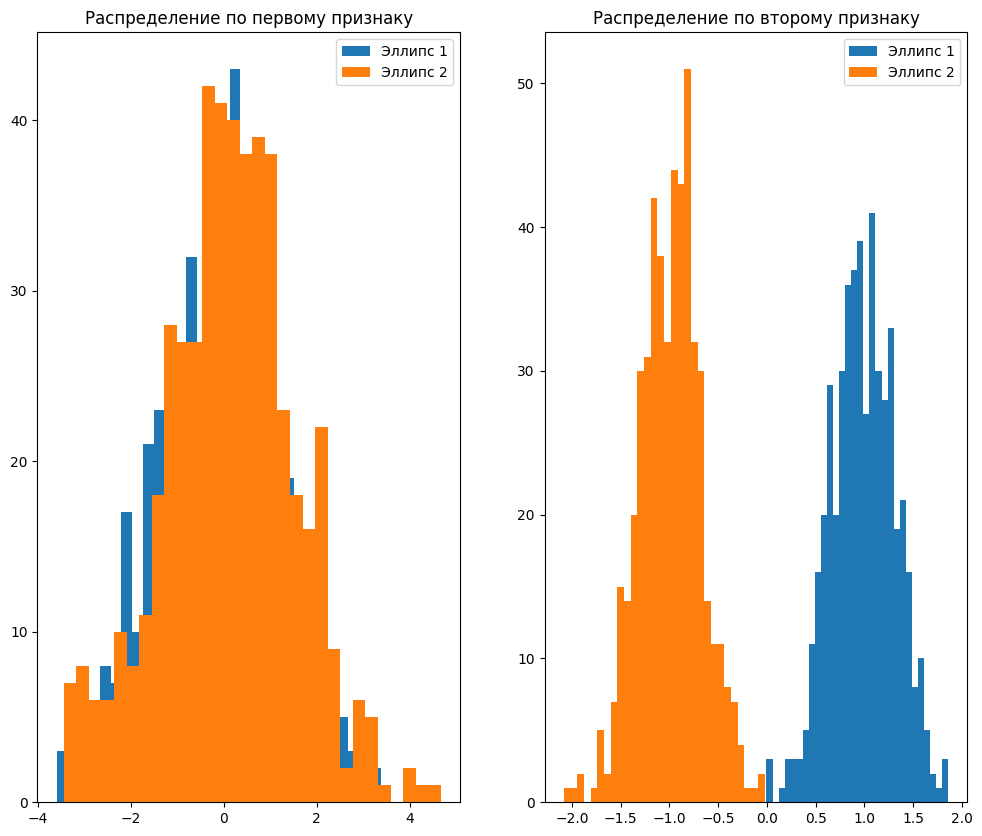

In [496]:
pc1 = x_elipses_centered @ VT[0, :]
pc2 = x_elipses_centered @ VT[1, :]

plt.figure(figsize=(12, 10))
plt.subplot(121)
plt.hist(pc1[:500], bins=30, label='Эллипс 1')
plt.hist(pc1[500:], bins=30, label='Эллипс 2')
plt.title('Распределение по первому признаку')
plt.legend()

plt.subplot(122)
plt.hist(pc2[:500], bins=30, label='Эллипс 1')
plt.hist(pc2[500:], bins=30, label='Эллипс 2')
plt.title('Распределение по второму признаку')
plt.legend()
plt.show()

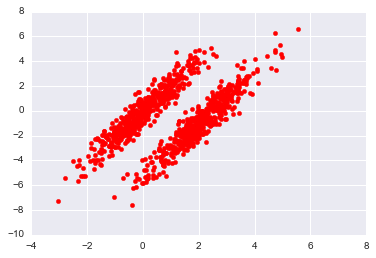

In [ ]:
# Just keep this image as a sample

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [497]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
C = np.array([1, 1])
cov_matrix = np.array([[1, 0], [0, 4]])
X = np.random.multivariate_normal(C, cov_matrix, size=1000)


**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Коварционная матрица диагональна, тогда интересные направления совпадают с осями координат:

1. Полуось по x: 1
2. Полуось по y: 2

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

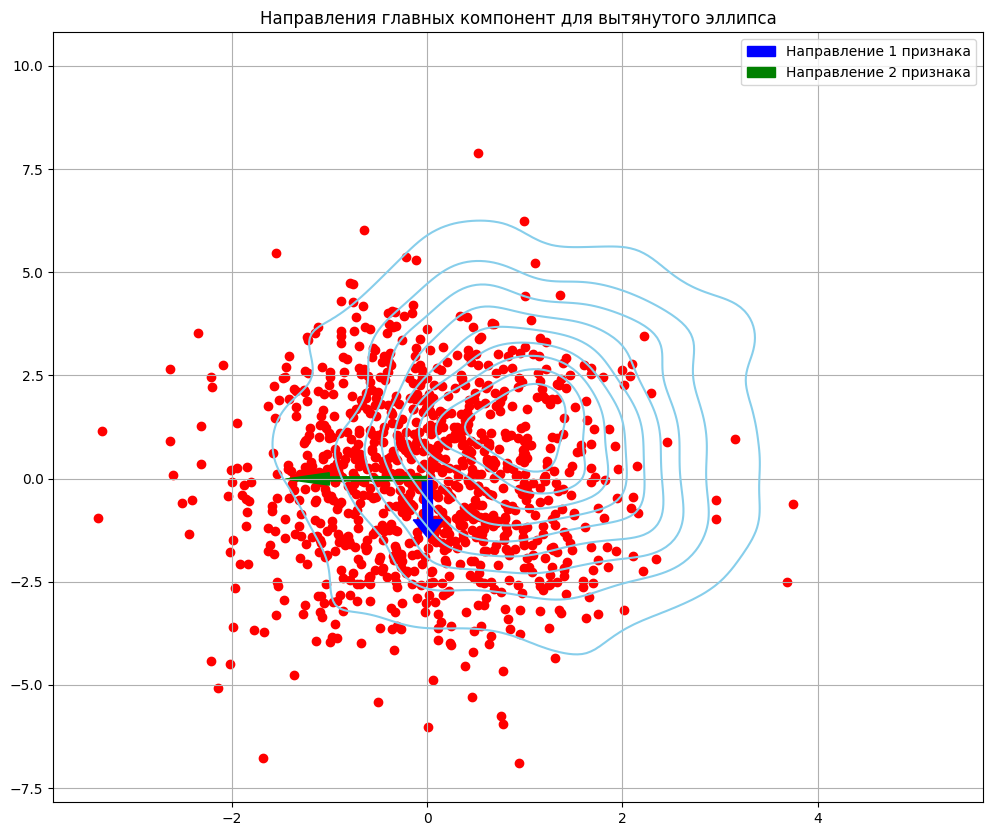

In [498]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_new = X - np.mean(X, axis=0)
U, S, VT = np.linalg.svd(X_new, full_matrices=False)

plt.figure(figsize=(12, 10))
plt.scatter(X_new[:, 0], X_new[:, 1], color='red')

plt.arrow(0, 0, VT[0, 0], VT[0, 1], color='blue', width=0.1, label='Направление 1 признака')
plt.arrow(0, 0, VT[1, 0], VT[1, 1], color='green', width=0.1, label='Направление 2 признака')
plt.title('Направления главных компонент для вытянутого эллипса')
plt.legend()
sns.kdeplot(x=X[:, 0], y=X[:, 1], fill=False, color='skyblue')
plt.grid(True)
plt.show()

**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

Направление признака 1 вертикально, значит проекция точек на направление признака 1 сохраняет только $y$ координату, в то время как информация о $x$ координате теряется

Это можно попробовать решить стандартизацией

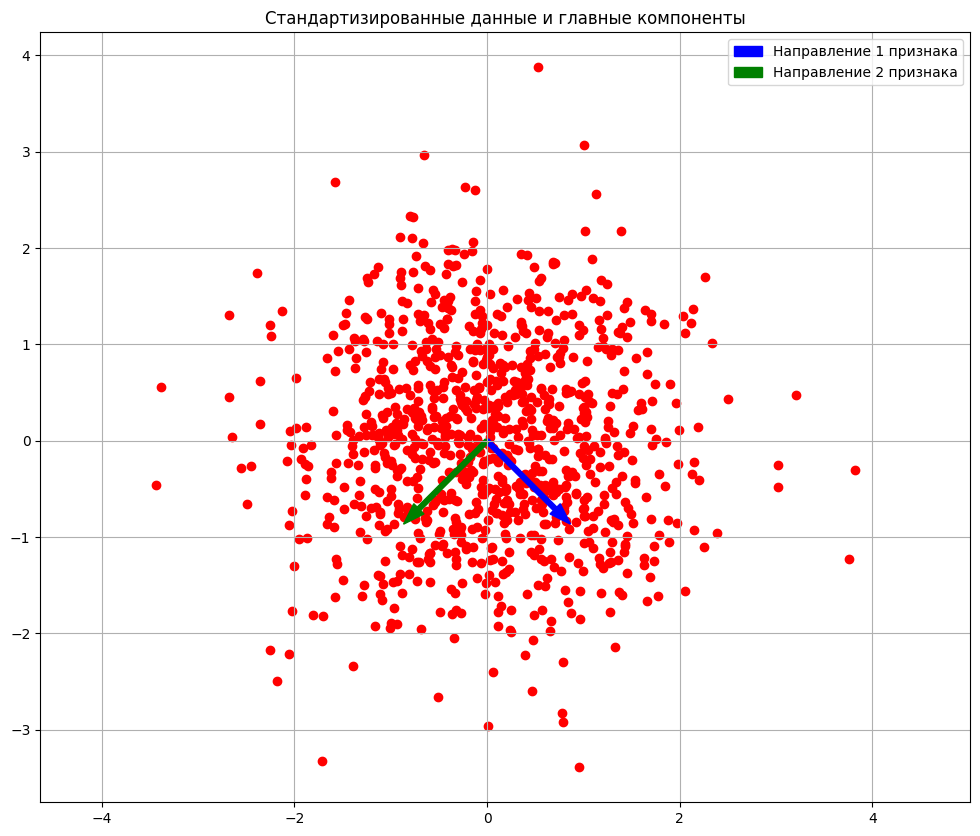

In [499]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X_new)

U, S, VT = np.linalg.svd(X_std, full_matrices=False)

plt.figure(figsize=(12, 10))
plt.scatter(X_std[:, 0], X_std[:, 1], color='red')

plt.arrow(0, 0, VT[0, 0], VT[0, 1], color='blue', width=0.05, label='Направление 1 признака')
plt.arrow(0, 0, VT[1, 0], VT[1, 1], color='green', width=0.05, label='Направление 2 признака')

plt.title('Стандартизированные данные и главные компоненты')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

Теперь оси направлены на 45 градусов и перпендикулярны друг другу